In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.animation as animation

In [6]:
hf = pd.read_csv('C:/Users/basan/Downloads/heart_failure_clinical_records_dataset.csv')

In [7]:
hf.platelets = hf.platelets/1000

In [8]:
hf.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265.00000               1.9           130    1   
1                    0  263.35803               1.1           136    1   
2                    0  162.00000               1.3           129    1   
3                    0  210.00000               1.9           137    1   
4                    0  327.00000               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [9]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

In [10]:
# PALETTE

from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

meshPalette = []
meshPalette_rev = []
nCol = 50

for i in range(nCol):
    meshPalette.append(colorFader("#71706E", "#990303", i/nCol))
    meshPalette_rev.append(colorFader("#990303","#9C9999", i/nCol))

cm = LinearSegmentedColormap.from_list("cmap_name", meshPalette, N=nCol)
cm_rev = LinearSegmentedColormap.from_list("cmap_name", meshPalette_rev, N=nCol)

#sns.palplot(meshPalette)
#sns.palplot(["#990303", "#9C9999", "#71706E", "#292323", "#FFFFFF"]);

In [11]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\841026145.py:9: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\841026145.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\841026145.py:10: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, ke

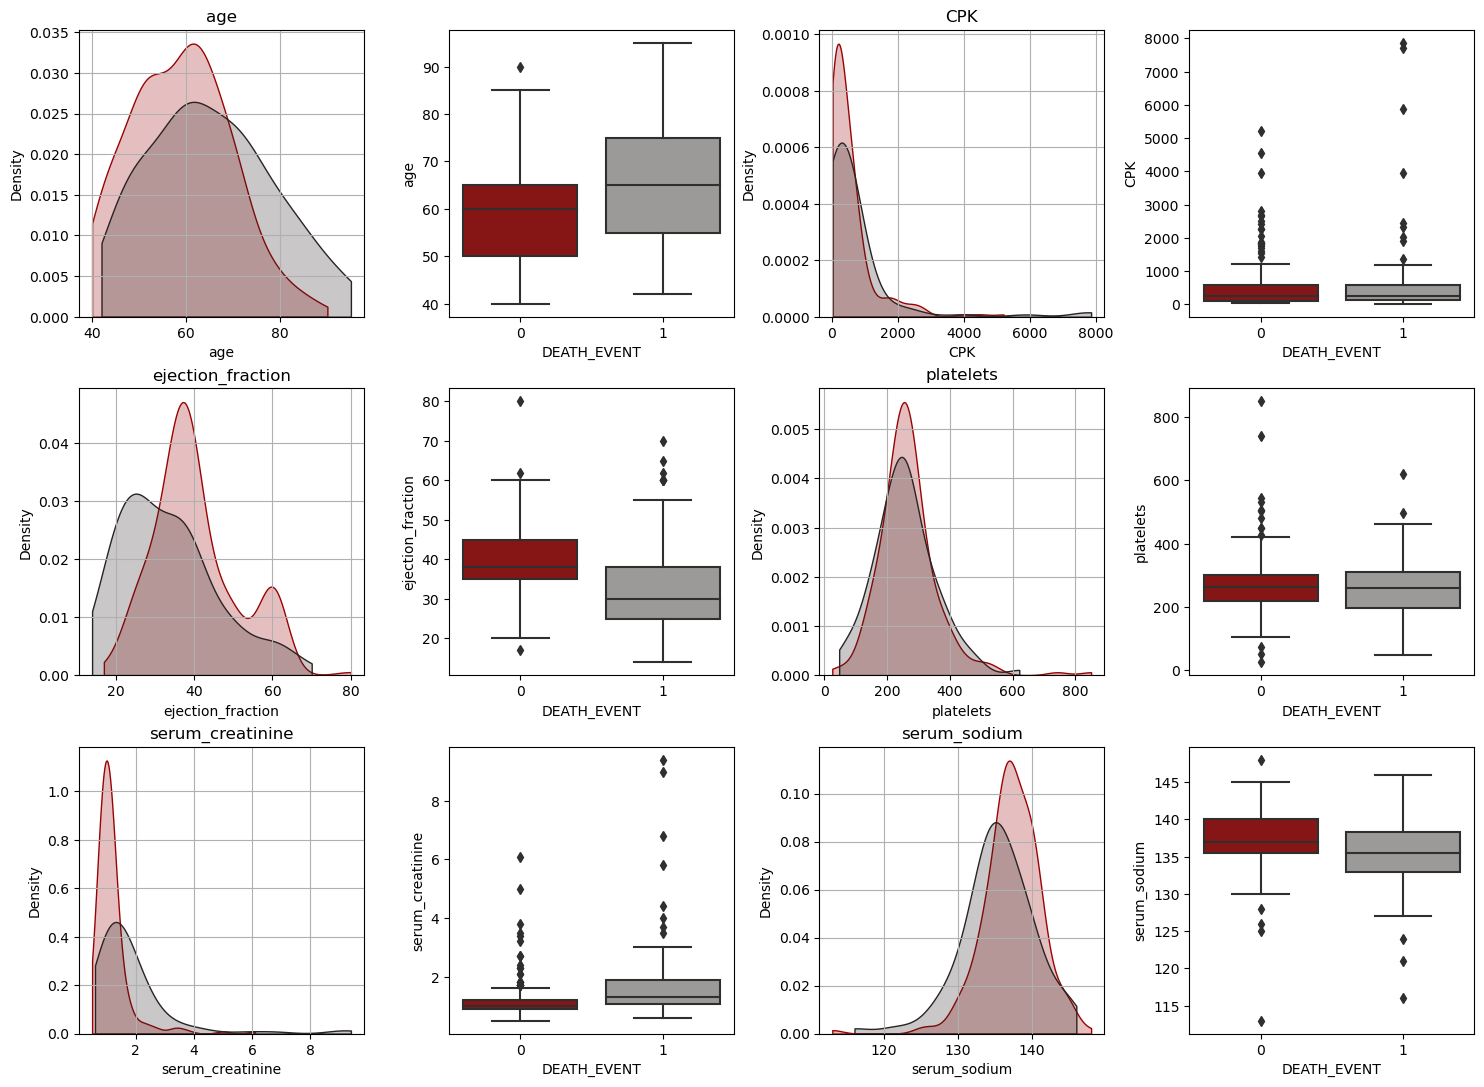

In [12]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])   

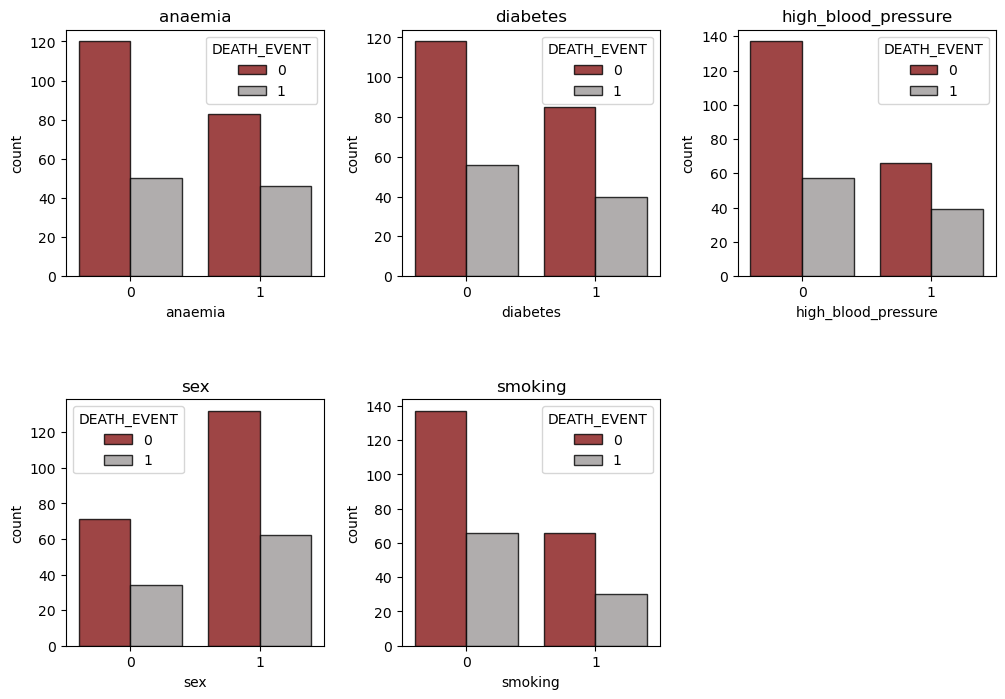

In [13]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

In [14]:
from sklearn.preprocessing import StandardScaler

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\2830694271.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\2830694271.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\2830694271.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, "ejection_fractio

FileNotFoundError: [Errno 2] No such file or directory: '../input/heart-failure-clinical-records-images/right_arrow.png'

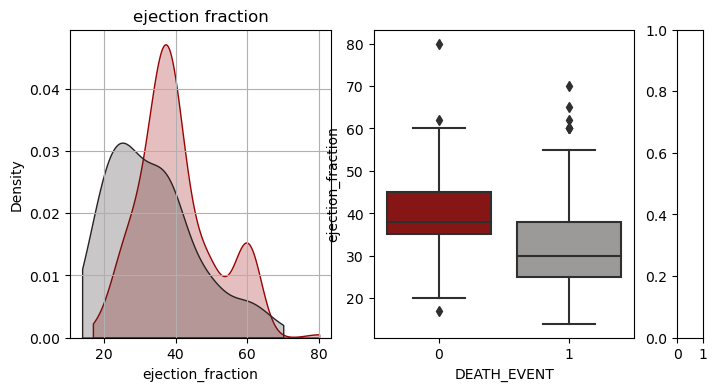

In [17]:
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])
    
plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1 ,0.1, 1, 1])
plt.subplot(gs[0])   
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[1]) 
sns.boxplot(y = "ejection_fraction", data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])  
plt.subplot(gs[2])
plt.imshow(mpimg.imread("../input/heart-failure-clinical-records-images/right_arrow.png"))
plt.axis('off')
plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[4])
sns.boxplot(y = "ejection_fraction", data = hf_norm, x="DEATH_EVENT", palette = ["#990303", "#9C9999"]);  
plt.tight_layout()

In [18]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

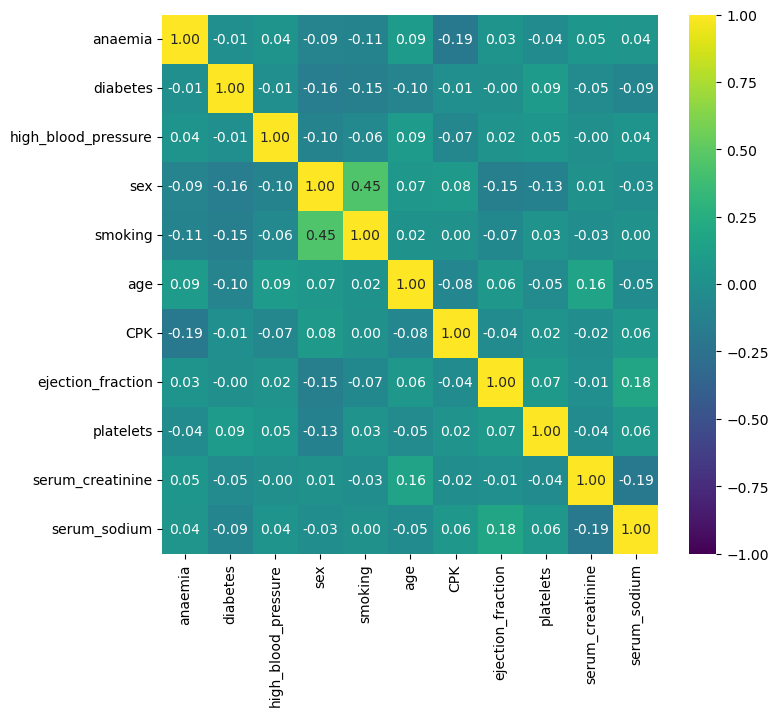

In [19]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

In [20]:
from scipy.stats import shapiro

#sw_df = pd.DataFrame(columns=["DEATH_EVENT=0", "DEATH_EVENT=1", "Both"])
index = [(feat, "statistic") for feat in numerical_features]
index.extend([(feat, "p-value") for feat in numerical_features])

index = pd.MultiIndex.from_tuples(index)

sw_df = pd.DataFrame(index=index,  columns = ["Both Classes", "DEATH_EVENT=0", "DEATH_EVENT=1"])

for feat in numerical_features:
    x = hf_norm[feat]
    stat, p = shapiro(x)
    
    sw_df["Both Classes"].loc[(feat, "statistic")] = stat
    sw_df["Both Classes"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==0, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=0"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=0"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==1, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=1"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=1"].loc[(feat, "p-value")] = p
    
sw_df = sw_df.unstack()

In [21]:
pd.set_option('display.float_format', '{:.3g}'.format)
sw_df

Both Classes           DEATH_EVENT=0            \
                       p-value statistic       p-value statistic   
CPK                   7.05e-28     0.514      8.51e-21     0.628   
age                   5.35e-05     0.975       0.00483      0.98   
ejection_fraction     7.22e-09     0.947       4.7e-09      0.92   
platelets             2.88e-12     0.912      5.14e-12     0.873   
serum_creatinine      5.39e-27     0.551      9.58e-22     0.589   
serum_sodium          9.22e-10     0.939      1.09e-08     0.925   

                  DEATH_EVENT=1            
                        p-value statistic  
CPK                    1.99e-17     0.439  
age                      0.0221     0.969  
ejection_fraction      4.54e-05     0.927  
platelets                0.0336     0.971  
serum_creatinine       1.28e-14     0.608  
serum_sodium            0.00384     0.958

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [23]:
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(hf_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(hf, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


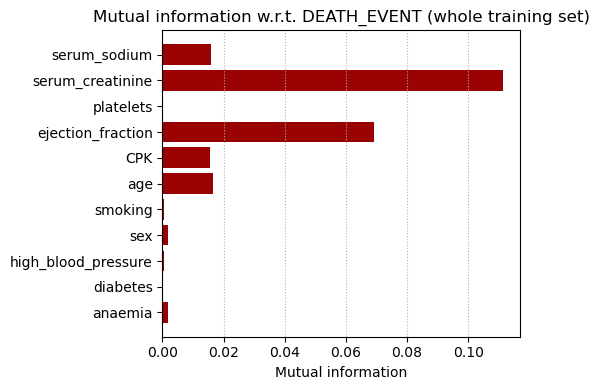

In [24]:
from sklearn.feature_selection import mutual_info_classif

    
MI = (mutual_info_classif(ho_train_df[all_features],
                             ho_train_df["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))

plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#990303")
plt.title("Mutual information w.r.t. DEATH_EVENT (whole training set)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print("Observed")
ctable = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
ctable.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
ctable.index = ["anaemia=0", "anaemia=1"]
ctable.loc["Total"] = ctable.sum()
ctable["Total"] = ctable.sum(axis=1)
ctable

Observed


DEATH_EVENT=0  DEATH_EVENT=1  Total
anaemia=0             94             34    128
anaemia=1             65             31     96
Total                159             65    224

In [26]:
print("Expected")
contingency_table = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
stat, p, dof, expected = chi2_contingency(contingency_table)
expected = pd.DataFrame(expected)
expected.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
expected.index = ["anaemia=0", "anaemia=1"]
expected

Expected


DEATH_EVENT=0  DEATH_EVENT=1
anaemia=0           90.9           37.1
anaemia=1           68.1           27.9

In [27]:
def chi2_test(df, feat1, feat2):

    contingency_table = pd.crosstab(df[feat1], df[feat2])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)
    #print('alpha=%.3f, critical_value=%.3f,\nstat=%.3f' % (1 - prob, critical, stat))

    # interpret p-value
    alpha = 1.0 - prob
    
    return stat, p

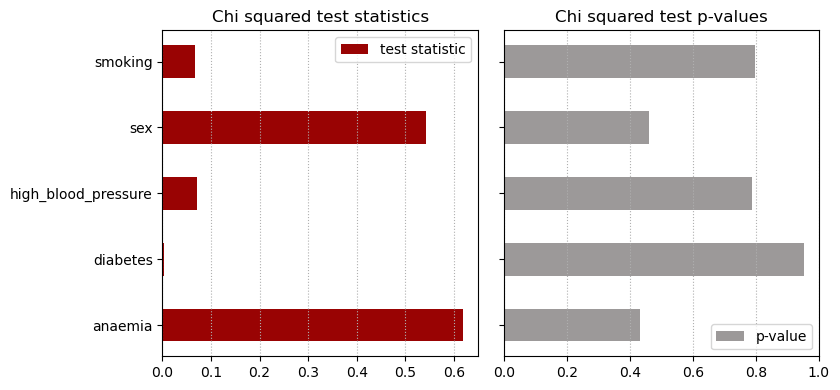

In [29]:
stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(ho_train_df, feat, "DEATH_EVENT")
    stats.append(stat)
    p_values.append(p)        

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="#990303", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#9C9999", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

In [30]:
kfold_train_df, kfold_val_df = ho_train_df.copy(), ho_val_df.copy()

all_features = ['anaemia', 'sex', 'age', 'CPK',
                'ejection_fraction', 'serum_creatinine', 'serum_sodium']

#ho_train_df, ho_val_df = ho_train_df[all_features+["DEATH_EVENT"]], ho_val_df[all_features+["DEATH_EVENT"]]
#unnorm_ho_train_df, unnorm_ho_val_df = unnorm_ho_train_df[all_features+["DEATH_EVENT"]], unnorm_ho_val_df[all_features+["DEATH_EVENT"]]

Mutual information with respect to DEATH_EVENT (5 folds)


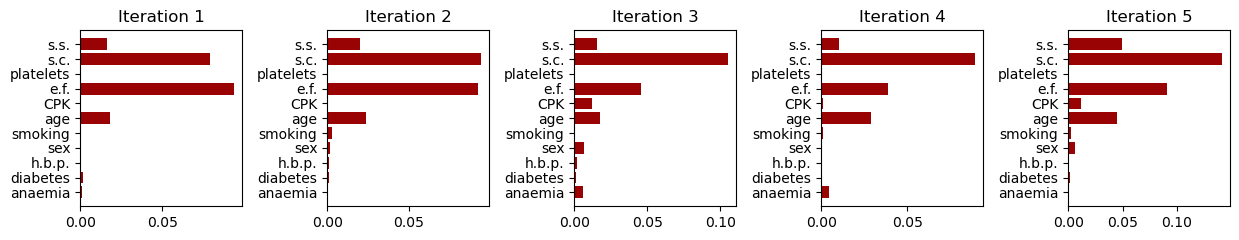

In [31]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(12.5, 2.5))

print("Mutual information with respect to DEATH_EVENT (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    MI=(mutual_info_classif(kfold_train_df.iloc[train_idx][categorical_features+numerical_features],
                             kfold_train_df.iloc[train_idx]["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.','sex', 'smoking', 'age', 'CPK', 'e.f.', 'platelets',
         's.c.', 's.s.'], width=MI, color="#990303", label="test statistic")
    
plt.tight_layout()  

Chi squared test statistics (5 folds)


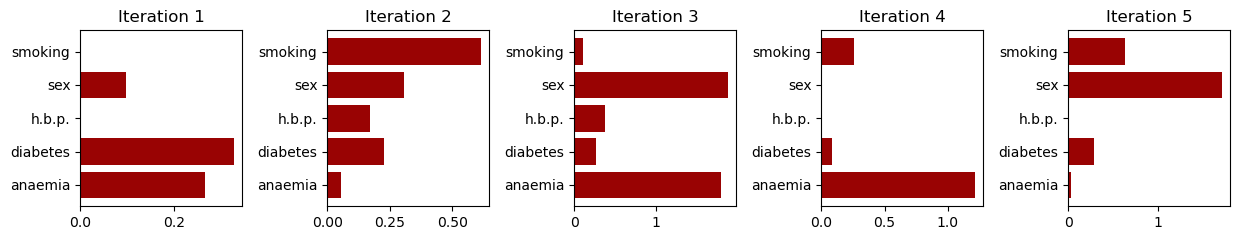

In [32]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(12.5, 2.5))
print("Chi squared test statistics (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    stats = []
    p_values = []

    for feat in categorical_features:

        stat, p = chi2_test(kfold_train_df.iloc[train_idx], feat, "DEATH_EVENT")
        stats.append(stat)
        p_values.append(p)
    
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.', 'sex', 'smoking'], width=stats, color="#990303", label="test statistic")
plt.tight_layout()

In [33]:
numerical_features = ['age', 'CPK', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
all_features_kfold = [
    ["anaemia", "diabetes"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
    ["anaemia", "sex"]+numerical_features,
    ["anaemia", "smoking"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
]

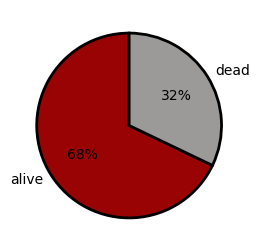

In [34]:
plt.figure(figsize=(3, 3))
plt.pie(hf["DEATH_EVENT"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["#990303", "#9C9999"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

In [35]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = ho_train_df[ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)

ho_train_df_rs = ho_train_df.append(new_samples)

new_samples = unnorm_ho_train_df[unnorm_ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)
unnorm_ho_train_df_rs = unnorm_ho_train_df.append(new_samples)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\2070853731.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho_train_df_rs = ho_train_df.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\2070853731.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unnorm_ho_train_df_rs = unnorm_ho_train_df.append(new_samples)


C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3873191204.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3873191204.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

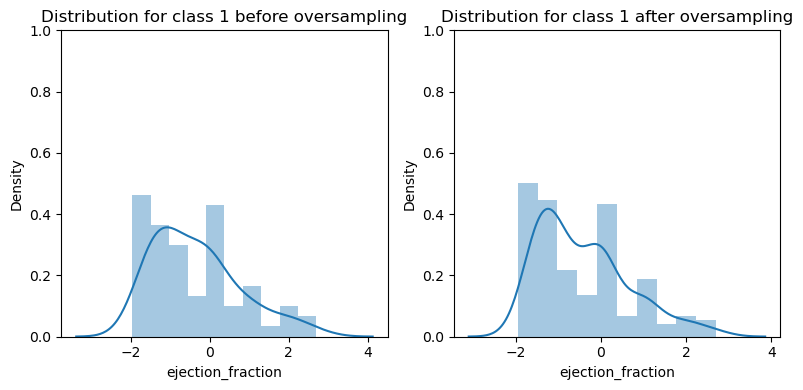

In [36]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before oversampling")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after oversampling")
sns.distplot(ho_train_df_rs[ho_train_df_rs.DEATH_EVENT==1].ejection_fraction, bins=nbins);
plt.tight_layout()

In [37]:
def rand_jitter(arr):
    np.random.seed(42)
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [38]:
norm = np.linalg.norm
import random
from random import sample 

def SMOTE(data, sampling_rate, n_neigh, random_state=42):
    random.seed(random_state)
    new_samples = []
    
    if sampling_rate==0:
        return
    
    if sampling_rate>n_neigh: return      
    data = data.reset_index(drop=True)

    n_samples = data.count()[0]

    for i in range(n_samples):
        dists = []
        for j in range(n_samples):
            if i==j: continue
            dists.append((j, norm(data.loc[i]-data.loc[j])))    
        
        topk = sorted(dists, key=lambda s: s[1])[:n_neigh]
        neighs = sample(topk, sampling_rate)

        for neigh in neighs:
            alpha = random.random()
            new_samples.append(data.loc[i] + alpha * (data.loc[neigh[0]]-data.loc[i]))
            
    return new_samples

In [39]:
%matplotlib notebook
plt.ioff()
fig, ax = plt.subplots(1, 1);
%matplotlib inline 
plt.ion()

In [40]:
fig.set_size_inches(4, 4);
fig.set_dpi(100)

def animate_func(i):
    new_samples = SMOTE(hf[hf["DEATH_EVENT"]==1][["ejection_fraction", "serum_creatinine"]], sampling_rate = i, n_neigh = 20)
    sm_hf = hf.copy()

    if new_samples:
        sm_hf = hf.append(new_samples)
        
    sm_hf["DEATH_EVENT"].fillna(1, inplace=True)
    
    ax.clear();

    ax.set_ylim(0, 17.5);
    ax.set_xlim(10, 90);
    
    ax.scatter((sm_hf[sm_hf["DEATH_EVENT"]==1]["ejection_fraction"]),
            sm_hf[sm_hf["DEATH_EVENT"]==1]["serum_creatinine"], s=5, label="DEAD", color="#71706E", alpha=1)
    ax.scatter(rand_jitter(sm_hf[sm_hf["DEATH_EVENT"]==0]["ejection_fraction"]),
            sm_hf[sm_hf["DEATH_EVENT"]==0]["serum_creatinine"], s=5, label="ALIVE", color="#990303", alpha=1)
    ax.legend()
    
    ax.set_xlabel("ejection_fraction")
    ax.set_ylabel("serum_creatinine")
    ax.set_title(f"Sampling rate: {i}, ALIVE = {sm_hf[sm_hf.DEATH_EVENT==0].count()[3]}, DEAD = {sm_hf[sm_hf.DEATH_EVENT==1].count()[3]}")

    return [fig]
    
anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = 10,
                               interval = 100, # in ms
                               );

HTML(anim.to_jshtml())

NameError: name 'HTML' is not defined

In [41]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = SMOTE(ho_train_df[ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

ho_train_df_sm = ho_train_df.append(new_samples)
ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)


new_samples = SMOTE(unnorm_ho_train_df[unnorm_ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

unnorm_ho_train_df_sm = unnorm_ho_train_df.append(new_samples)
unnorm_ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\1877632680.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho_train_df_sm = ho_train_df.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\1877632680.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unnorm_ho_train_df_sm = unnorm_ho_train_df.append(new_samples)


C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3835742828.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3835742828.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<IPython.core.display.Javascript object>


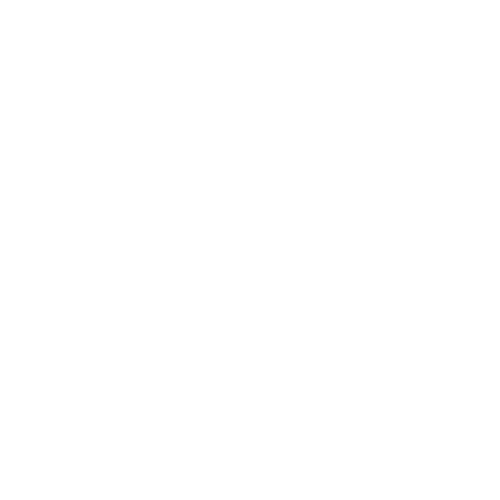

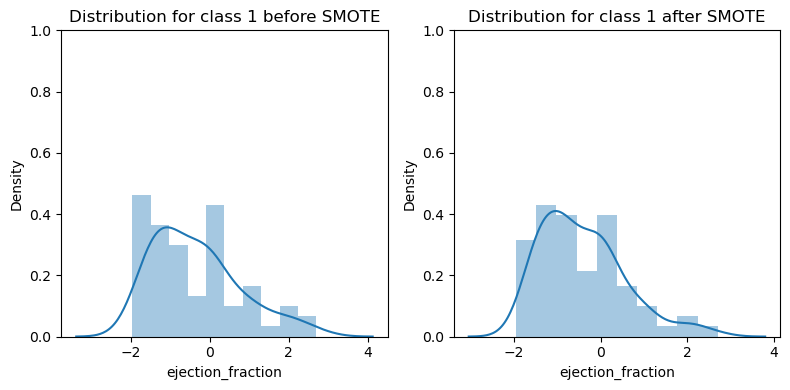

AttributeError: 'NoneType' object has no attribute 'remove_callback'

In [42]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before SMOTE")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after SMOTE")
sns.distplot(ho_train_df_sm[ho_train_df_sm.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.tight_layout();

In [43]:
w = len(ho_train_df) / (2 * np.bincount(ho_train_df.DEATH_EVENT))
print(f"class 0: {w[0]} \nclass 1: {w[1]}")

class 0: 0.7044025157232704 
class 1: 1.7230769230769232


In [44]:
# KFOLD

class KFold():
    
    # caching smote results 
    smote_folds = None
    smote_labels = None
    
    def __init__(self, all_features_kfold, random_state=42):
        self.smote_folds = []
        self.smote_labels = []
        self.features = all_features_kfold
        
        self.kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    def fit_predict(self, model, X, y, threshold = None, resampling = None, cached = False):
        acc, rec, pre, f1 = 0, 0, 0, 0
        
        if resampling=="SMOTE" and not cached:
            self.smote_folds = []
            self.smote_labels = []
        
        for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
           
            X_fold = X[self.features[i]] # for each fold we have different features
        
            X_train, X_val = X_fold.iloc[train_idx], X_fold.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            if resampling=="oversampling":
                n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                new_samples = X_train[y_train==1].sample(n_to_sample, replace=True, random_state=42)
                
                X_train = X_train.append(new_samples)
                y_train = y_train.append(pd.Series([1]*len(new_samples)))
                
                X_train = X_train.reset_index(drop=True)
                y_train = y_train.reset_index(drop=True)

            if resampling=="SMOTE": 
                if not cached or len(self.smote_folds)<5 or len(self.smote_labels)<5:
                    n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                    new_samples = SMOTE(X_train[y_train==1], sampling_rate = 1, n_neigh = 50)

                    # categorical attributes need to be fixed
                    for s in new_samples:
                        if "anaemia" in  s.index:
                            s["anaemia"] = np.round(s["anaemia"])
                        if "high_blood_pressure" in s.index:
                            s["high_blood_pressure"] = np.round(s["high_blood_pressure"])
                        if "sex" in  s.index:
                            s["sex"] = np.round(s["sex"])
                        if "smoking" in  s.index:
                            s["smoking"] = np.round(s["smoking"])
                        if "diabetes" in  s.index:
                            s["diabetes"] = np.round(s["diabetes"])
                                            
                    X_train = X_train.append(new_samples, ignore_index=True)
                    y_train = y_train.append(pd.Series([1]*len(new_samples)))
                    
                    X_train = X_train.reset_index(drop=True)
                    y_train = y_train.reset_index(drop=True)
                    
                    # cache smoted folds
                    self.smote_folds.append(X_train)
                    self.smote_labels.append(y_train)
                    
                else:
                    # use cached folds
                    X_train = self.smote_folds[i]
                    y_train = self.smote_labels[i]

            model.fit(X_train, y_train)
            preds = model.predict(X_val)

            if threshold:
                preds[preds>=threshold] = 1
                preds[preds<threshold] = 0

            acc += accuracy_score(y_val, preds)
            pre += precision_score(y_val, preds)
            rec += recall_score(y_val, preds)
            f1 += f1_score(y_val, preds)

        acc /= 5
        pre /= 5
        rec /= 5
        f1 /= 5
        return acc, pre, rec, f1

In [45]:
# initialize kfold object
kfold = KFold(all_features_kfold, random_state=42)

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve

In [47]:
final_results = pd.DataFrame(columns=["Model", "Holdout Original","Holdout Oversampling", "Holdout SMOTE", 
                   "Holdout class-weight=balanced", "KFold Original", "KFold Oversampling",
                   "KFold SMOTE", "KFold class-weight=balanced"])

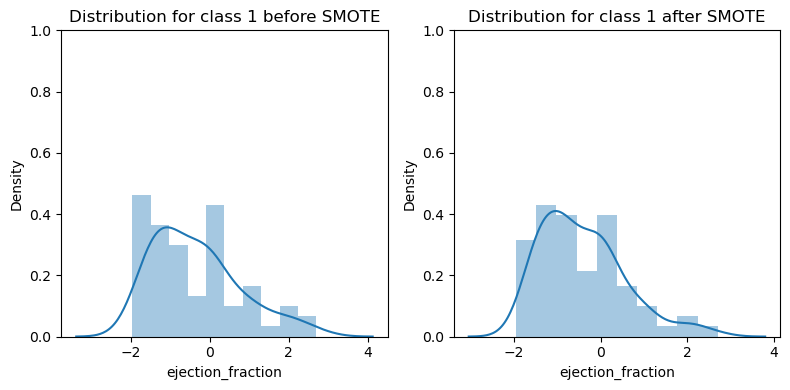

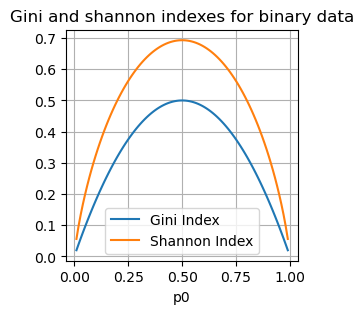

In [48]:
p = np.linspace(1e-2, 1-1e-2, 100)

plt.figure(figsize=(3, 3))
plt.plot(p, [1-pj**2-(1-pj)**2 for pj in p], label="Gini Index")
plt.plot(p, [-((pj*np.log(pj))+((1-pj)*np.log(1-pj))) for pj in p], label="Shannon Index")
plt.grid()
plt.legend();
plt.xlabel("p0")
plt.title("Gini and shannon indexes for binary data");

In [50]:
%matplotlib notebook
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.ioff()
fig, (ax1, ax2) = plt.subplots(1, 2);
%matplotlib inline 
plt.ion()

depth = range(1, 6)
h = 0.03
x_min, x_max = hf["ejection_fraction"].min() - 1, hf["ejection_fraction"].max() + 1
y_min, y_max = hf["serum_creatinine"].min() - .5, hf["serum_creatinine"].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

fig.set_size_inches(14, 7);
def animate_func(i):
    
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth[i], random_state=42, )
    dt.fit(hf[["ejection_fraction", "serum_creatinine"]], hf.DEATH_EVENT)
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax1.clear()
    ax1.contourf(xx, yy, Z, alpha=0.5, cmap=cm_rev)
    ax1.scatter(hf[hf["DEATH_EVENT"]==0]["ejection_fraction"],
                hf[hf["DEATH_EVENT"]==0]["serum_creatinine"], label="alive", color="#990303", edgecolor='BLACK')
    ax1.scatter(hf[hf["DEATH_EVENT"]==1]["ejection_fraction"],
                hf[hf["DEATH_EVENT"]==1]["serum_creatinine"], label="dead", color="#9C9999", edgecolor='BLACK')

    ax1.set_xlabel("ejection_fraction")
    ax1.set_ylabel("serum_creatinine")
    ax1.legend();
    
    tree.plot_tree(dt,  feature_names=["e.f.", "s.c."], filled=True,
                   label='none', ax=ax2, rounded=True, proportion=True, impurity=False);
    ax2.set_title(f"Decision tree (depth: {i+1})")
    
    fig.tight_layout()
    return [fig]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(depth),
                               interval = 200, # in ms
                               );

HTML(anim.to_jshtml())

C:\Users\basan\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\basan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\basan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3908600308.py:40: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\basan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not ha

In [51]:
depth = range(1, 12)

rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
w_acc, w_rec, w_pre, w_f1 = [], [], [], []

for d in depth: 
    # random oversampling 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df_rs[all_features], unnorm_ho_train_df_rs['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    rs_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    
    # SMOTE 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df_sm[all_features], unnorm_ho_train_df_sm['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    sm_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    
    # not resampled
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    no_rs_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
 
    # weighted classes
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight='balanced')
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    w_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))

In [52]:
#sorted([(a, b) for a, b in zip(no_rs_acc, no_rs_f1)], key= lambda a: a[0]+a[1])[-1];

<IPython.core.display.Javascript object>


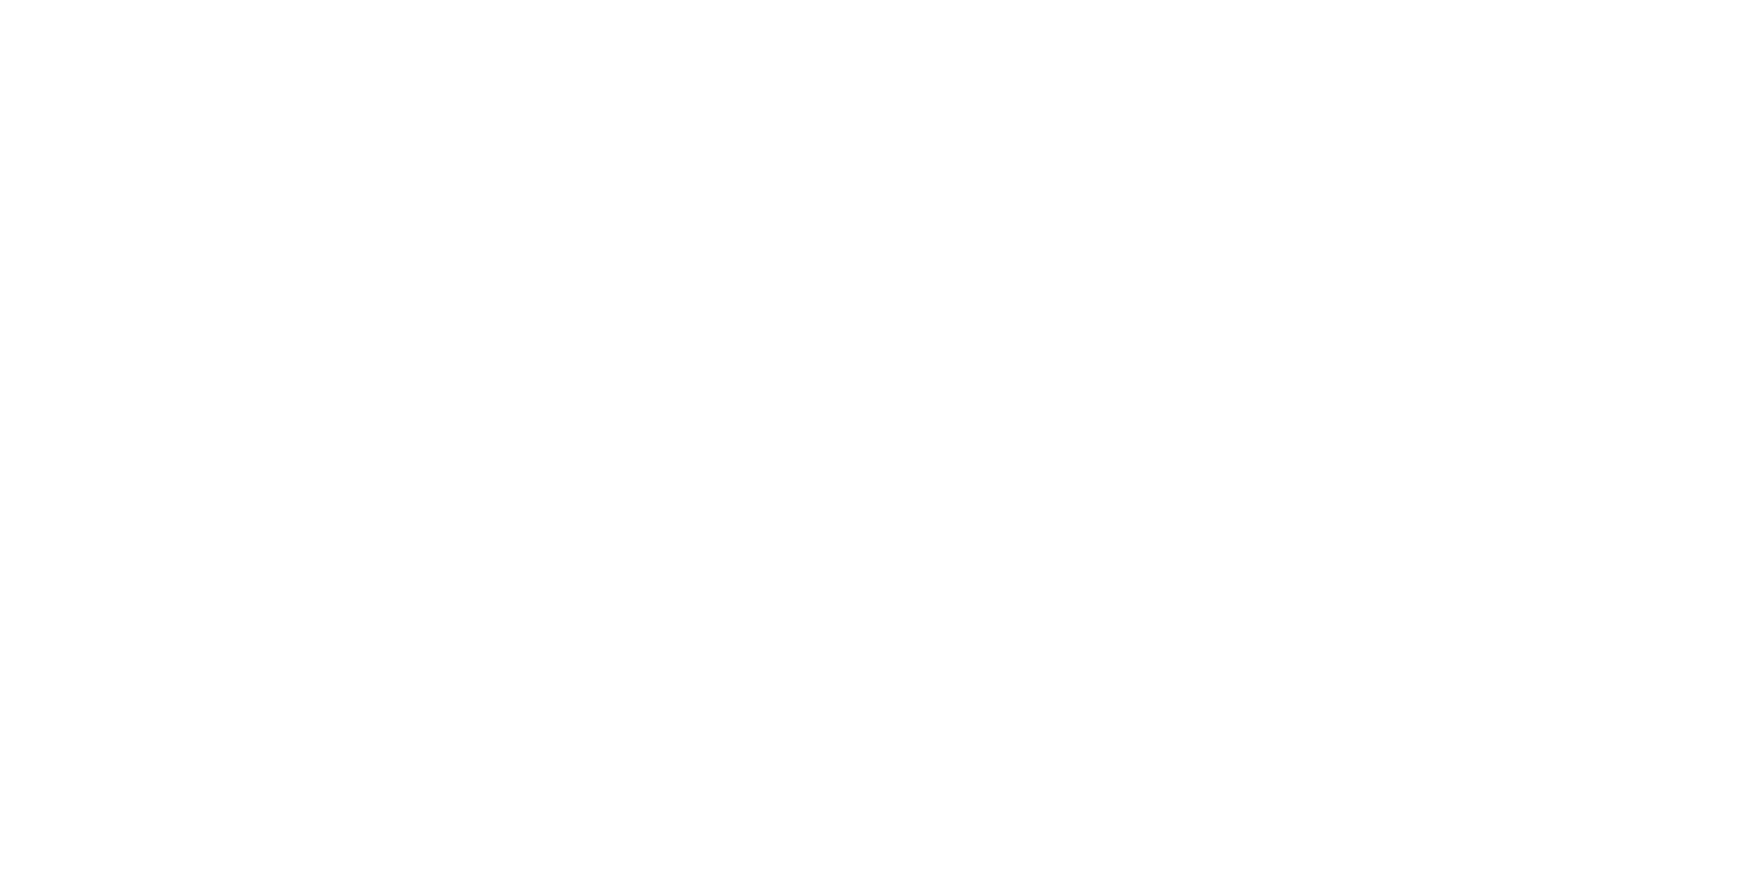

<IPython.core.display.Javascript object>


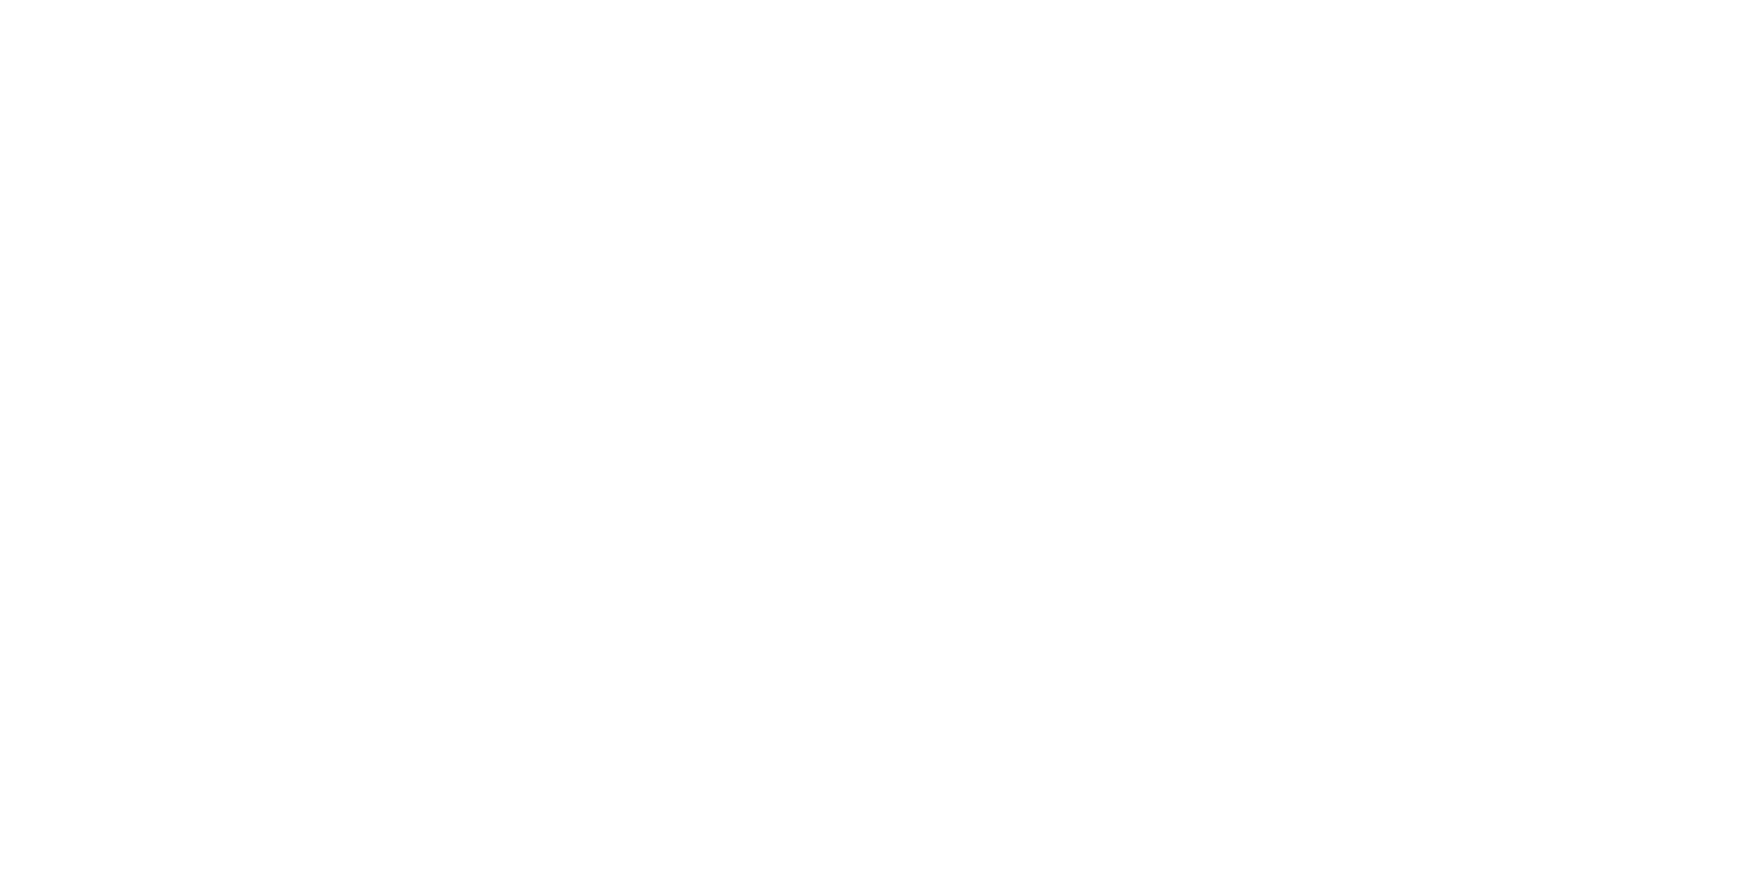

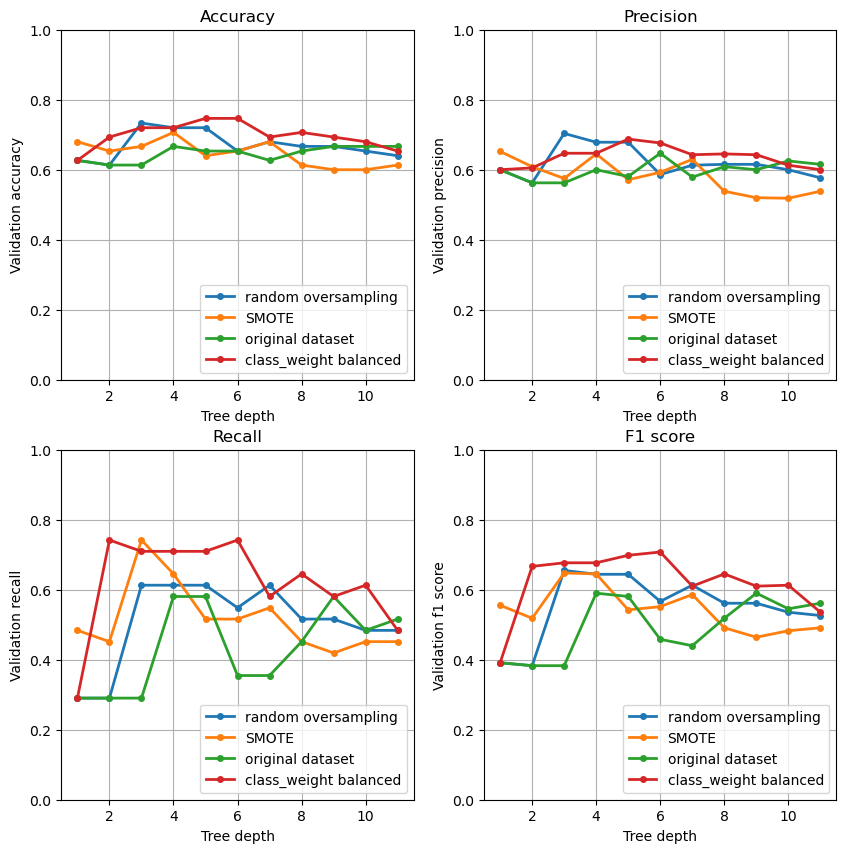

AttributeError: 'NoneType' object has no attribute 'remove_callback'

In [53]:
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 2, 1)    
plt.plot(list(depth), rs_acc, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_acc, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_acc, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_acc, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy")
plt.xlabel("Tree depth")
plt.title("Accuracy")

# precision
plt.subplot(2, 2, 2)    
plt.plot(list(depth), rs_pre, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_pre, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_pre, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_pre, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation precision")
plt.xlabel("Tree depth")
plt.title("Precision")

# recall
plt.subplot(2, 2, 3)    
plt.plot(list(depth), rs_rec, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_rec, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_rec, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_rec, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation recall")
plt.xlabel("Tree depth")
plt.title("Recall")

# f1 score
plt.subplot(2, 2, 4)    
plt.plot(list(depth), rs_f1, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_f1, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_f1, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_f1, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation f1 score")
plt.xlabel("Tree depth")
plt.title("F1 score");

In [54]:
# KFOLD

rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
w_acc, w_rec, w_pre, w_f1 = [], [], [], []

for d in depth: 
    # random oversampling 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          resampling="oversampling")
    rs_acc.append(acc)
    rs_rec.append(rec)
    rs_pre.append(pre)
    rs_f1.append(f1)
    
    # SMOTE 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          cached=True, resampling="SMOTE")
    sm_acc.append(acc)
    sm_rec.append(rec)
    sm_pre.append(pre)
    sm_f1.append(f1)
    
    # not resampled
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'])
    no_rs_acc.append(acc)
    no_rs_rec.append(rec)
    no_rs_pre.append(pre)
    no_rs_f1.append(f1)
 
    # weighted classes
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight='balanced')
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'])
    w_acc.append(acc)
    w_rec.append(rec)
    w_pre.append(pre)
    w_f1.append(f1)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_samples)))
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_sampl

In [55]:
#sorted([(a, b) for a, b in zip(w_acc, w_f1)], key= lambda a: a[0]+a[1]);

In [56]:
%matplotlib notebook
plt.ioff()
fig, ax = plt.subplots(1, 1);
%matplotlib inline 
plt.ion()

fig.set_size_inches(20, 15);
def animate_func(i):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i+1, random_state=42, class_weight='balanced')
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    
    tree.plot_tree(dt,  feature_names=all_features, filled=True, label='all', ax=ax, rounded=True, proportion=True);
    ax.set_title(f"Decision tree (depth: {i+1})", fontsize=25)
    # value are float variables due to class_weight="balanced"
    return [fig]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = 11,
                               interval = 200, # in ms
                               );

HTML(anim.to_jshtml())

C:\Users\basan\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [57]:
# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

max_features='sqrt' # square root of number of features       
max_depth = 14
depth = range(1, max_depth)
n_trees = [5, 10, 20, 50, 100]
n_vals = len(n_trees)

rs_acc, rs_oob_acc, rs_rec, rs_pre, rs_f1= [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
sm_acc, sm_oob_acc, sm_rec, sm_pre, sm_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
no_rs_acc, no_rs_oob_acc, no_rs_rec, no_rs_pre, no_rs_f1= [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
w_acc, w_oob_acc, w_rec, w_pre, w_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals

for i,n in enumerate(n_trees):
    
    rs_acc[i], rs_oob_acc[i], rs_rec[i], rs_pre[i], rs_f1[i] = [], [], [], [], []
    sm_acc[i], sm_oob_acc[i], sm_rec[i], sm_pre[i], sm_f1[i] = [], [], [], [], []
    no_rs_acc[i], no_rs_oob_acc[i], no_rs_rec[i], no_rs_pre[i], no_rs_f1[i] = [], [], [], [], []
    w_acc[i], w_oob_acc[i], w_rec[i], w_pre[i], w_f1[i] = [], [], [], [], []

    for d in depth: 
        # random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)
        
        rf.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        rs_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        rs_oob_acc[i].append(rf.oob_score_)
        rs_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        rs_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        rs_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

        # SMOTE
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)

        rf.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        sm_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        sm_oob_acc[i].append(rf.oob_score_)
        sm_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        sm_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        sm_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))
        
        # no random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)

        rf.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        no_rs_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_oob_acc[i].append(rf.oob_score_)
        no_rs_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

        # class weight
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight='balanced')

        rf.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        w_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        w_oob_acc[i].append(rf.oob_score_)
        w_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        w_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        w_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [58]:
%matplotlib notebook
plt.ioff()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2);
%matplotlib inline 
plt.ion()

In [59]:
fig.set_size_inches(7, 7);
def animate_func(i):  
    # accuracy
    ax1.clear();
    ax1.plot(list(depth), rs_acc[i], label="random oversampling", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), sm_acc[i], label="SMOTE", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), no_rs_acc[i], label = "original dataset", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), w_acc[i], label = "class_weight balanced", linewidth=1.5, marker='o', markersize=3);

    ax1.plot(list(depth), rs_oob_acc[i], label="random oversampling OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#287CB7");
    ax1.plot(list(depth), sm_oob_acc[i], label="SMOTE OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#FE8417");
    ax1.plot(list(depth), no_rs_oob_acc[i], label = "original dataset OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#34A334");
    ax1.plot(list(depth), w_oob_acc[i], label = "class_weight balanced OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#D62728");

    ax1.legend(fontsize=7, loc=3);
    ax1.grid(True);
    ax1.set_ylim(0, 1);
    ax1.set_ylabel("Validation accuracy");
    ax1.set_xlabel("Single tree depth");
    ax1.set_title(f"Accuracy (n_trees: {n_trees[i]})");

    # precision
    ax2.clear();
    ax2.plot(list(depth), rs_pre[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), sm_pre[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), no_rs_pre[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), w_pre[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax2.legend(fontsize=7, loc=3);
    ax2.grid(True);
    ax2.set_ylim(0, 1);
    ax2.set_ylabel("Validation precision");
    ax2.set_xlabel("Single tree depth");
    ax2.set_title(f"Precision (n_trees: {n_trees[i]})");

    # recall
    ax3.clear();
    ax3.plot(list(depth), rs_rec[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), sm_rec[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), no_rs_rec[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), w_rec[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax3.legend(fontsize=7, loc=4);
    ax3.grid(True);
    ax3.set_ylim(0, 1);
    ax3.set_ylabel("Validation recall");
    ax3.set_xlabel("Single tree depth");
    ax3.set_title(f"Recall (n_trees: {n_trees[i]})");

    # f1 score
    ax4.clear();
    ax4.plot(list(depth), rs_f1[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), sm_f1[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), no_rs_f1[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), w_f1[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax4.legend(fontsize=7, loc=4);
    ax4.grid(True);
    ax4.set_ylim(0, 1);
    ax4.set_ylabel("Validation f1 score");
    ax4.set_xlabel("Single tree depth");
    ax4.set_title(f"F1 score (n_trees: {n_trees[i]})");
    
    fig.tight_layout()
    return [fig];

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = n_vals,
                               interval = 100, # in ms
                               );
HTML(anim.to_jshtml())

In [60]:
# KFOLD 

rs_acc, rs_oob_acc, rs_rec, rs_pre, rs_f1= [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
sm_acc, sm_oob_acc, sm_rec, sm_pre, sm_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
w_acc, w_oob_acc, w_rec, w_pre, w_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals

for i,n in enumerate(n_trees):
    
    rs_acc[i], rs_oob_acc[i], rs_rec[i], rs_pre[i], rs_f1[i] = [], [], [], [], []
    sm_acc[i], sm_oob_acc[i], sm_rec[i], sm_pre[i], sm_f1[i] = [], [], [], [], []
    w_acc[i], w_oob_acc[i], w_rec[i], w_pre[i], w_f1[i] = [], [], [], [], []

    for d in depth: 
        # random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                     random_state=42, class_weight=None)
        
        acc, rec, pre, f1 = kfold.fit_predict(rf, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          resampling="oversampling")
        rf.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT']);
        rs_acc[i].append(acc)
        
        rs_rec[i].append(rec)
        rs_pre[i].append(pre)
        rs_f1[i].append(f1)

        # SMOTE
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    random_state=42, class_weight=None)

        acc, rec, pre, f1 = kfold.fit_predict(rf, ho_train_df, ho_train_df['DEATH_EVENT'], 
                                               resampling="SMOTE", cached=True)
        sm_acc[i].append(acc)
        sm_rec[i].append(rec)
        sm_pre[i].append(pre)
        sm_f1[i].append(f1)
        
        # no random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                     random_state=42, class_weight=None)

        acc, rec, pre, f1 = kfold.fit_predict(rf, ho_train_df, ho_train_df['DEATH_EVENT'])
        no_rs_acc[i].append(acc)
        no_rs_rec[i].append(rec)
        no_rs_pre[i].append(pre)
        no_rs_f1[i].append(f1)

        # class weight
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                     random_state=42, class_weight='balanced')

        acc, rec, pre, f1 = kfold.fit_predict(rf, ho_train_df, ho_train_df['DEATH_EVENT'])
        w_acc[i].append(acc)
        w_rec[i].append(rec)
        w_pre[i].append(pre)
        w_f1[i].append(f1)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_samples)))
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_sampl

In [61]:
#acc = [a for b in w_acc for a in b]
#f1 =  [a for b in w_f1 for a in b]
#sorted([(a, b) for a, b in zip(acc, f1)], key=lambda a: a[0]+a[1])

In [62]:
# holdout

threshold=0.5

# oversampled 
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_rs = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# SMOTE 
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_sm = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
sm_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
sm_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
sm_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
sm_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# not oversampled
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_no_rs = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
no_rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [63]:
# oversampled 
lr = LinearRegression(fit_intercept=True)
rs_acc, rs_rec, rs_pre, rs_f1 = kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5, resampling="oversampling")
    
# SMOTE 
lr = LinearRegression(fit_intercept=True)
sm_acc, sm_rec, sm_pre, sm_f1 = kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5, resampling="SMOTE", cached=True)
    
# not oversampled
lr = LinearRegression(fit_intercept=True)
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1= kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_samples)))
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_sampl

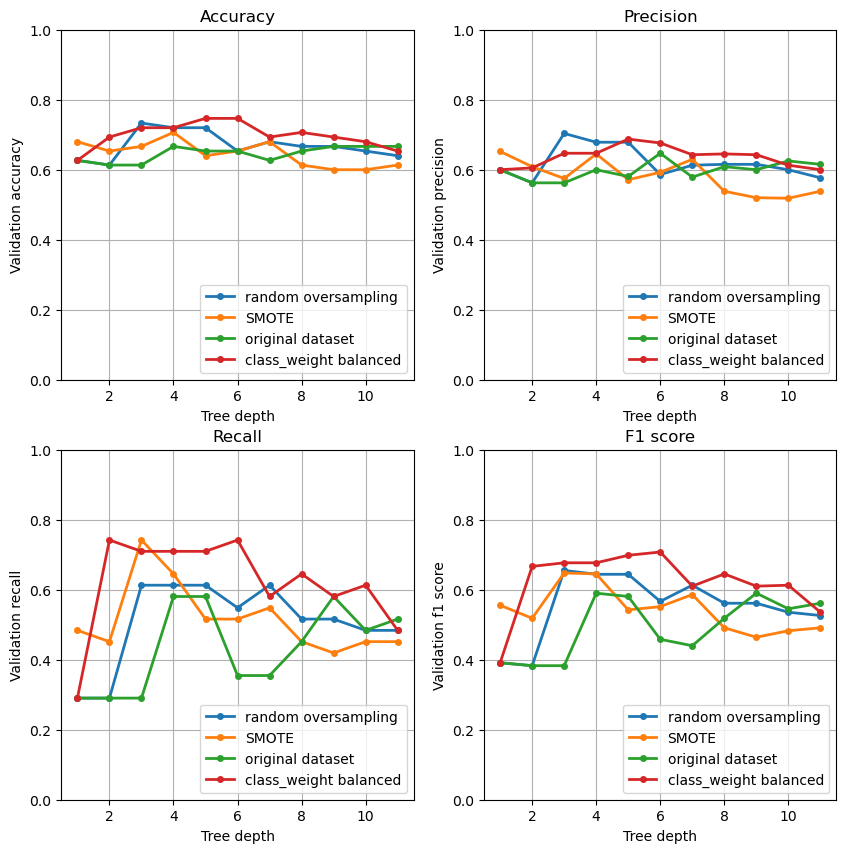

<IPython.core.display.Javascript object>


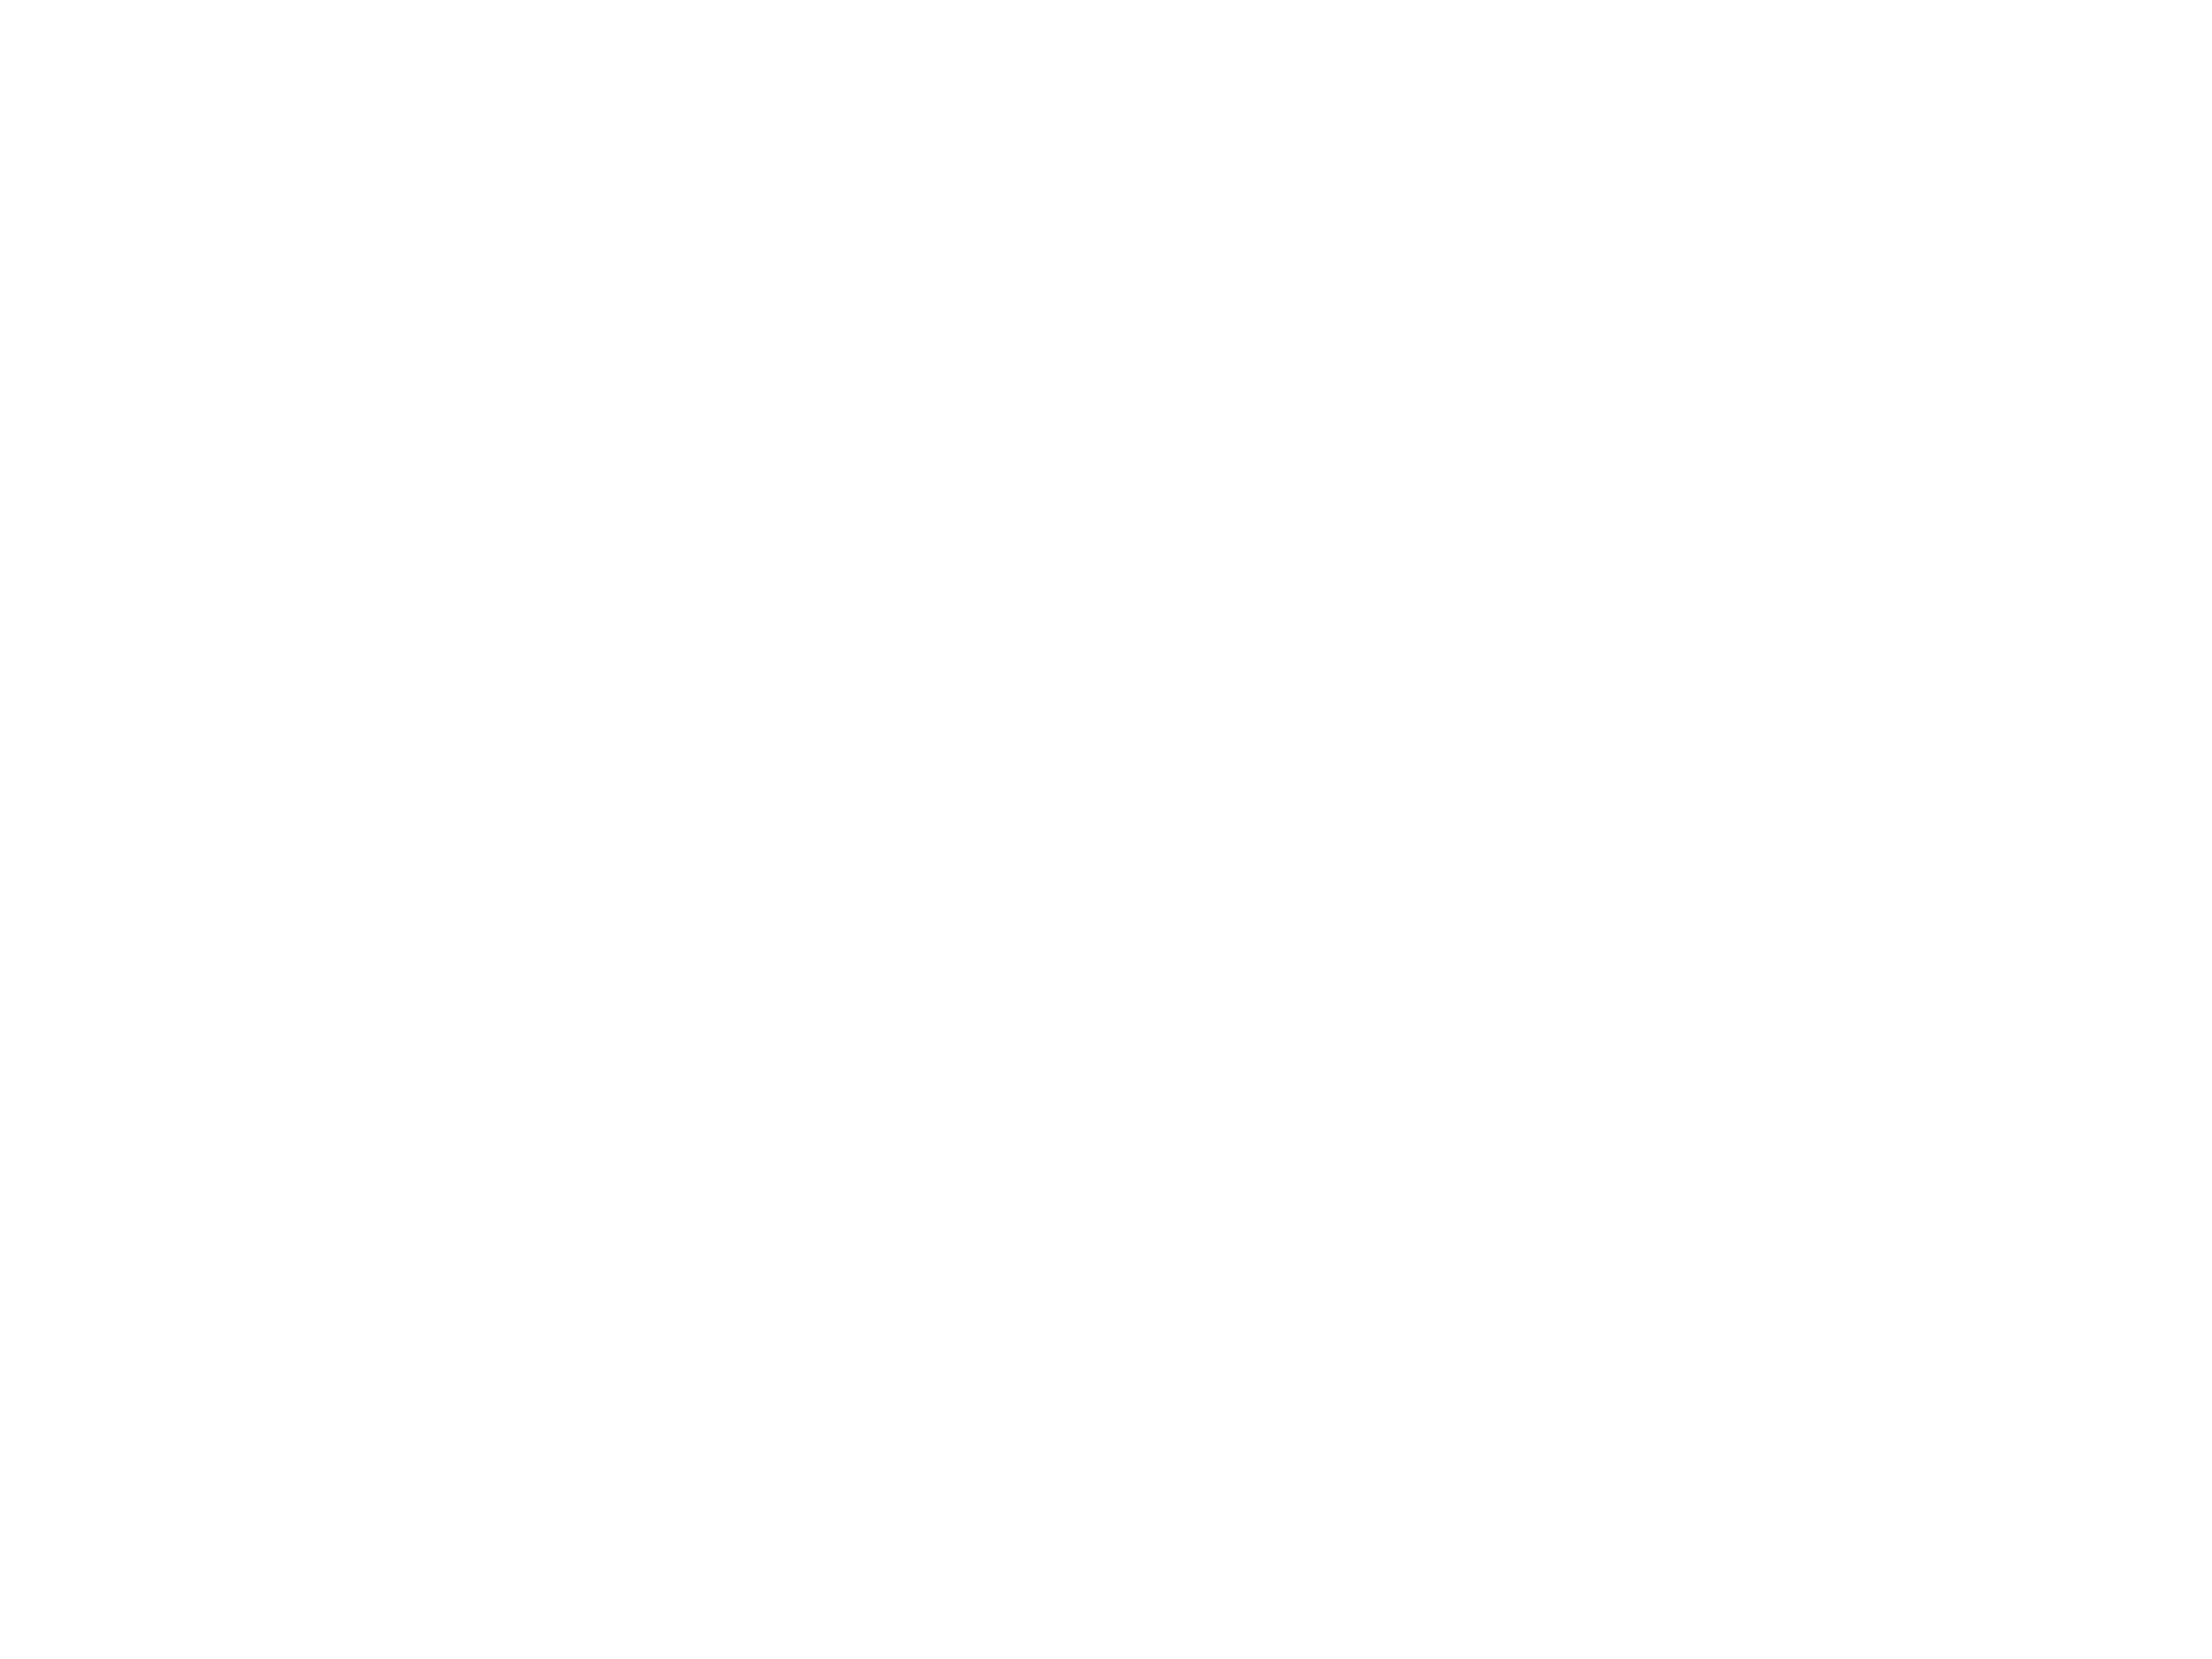

<IPython.core.display.Javascript object>


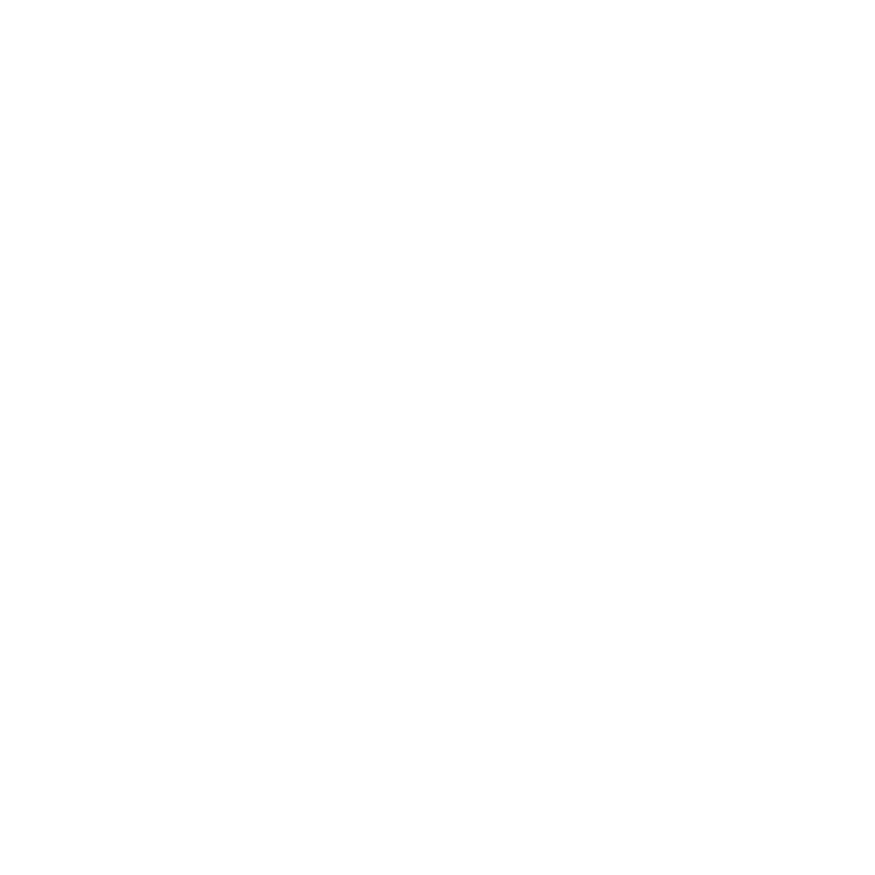

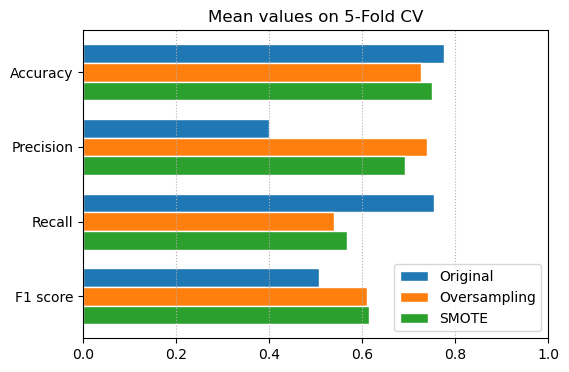

AttributeError: 'NoneType' object has no attribute 'remove_callback'

In [64]:
# https://python-graph-gallery.com/11-grouped-barplot/

fig = plt.figure(figsize=(6, 4))
barWidth = 0.25
space=0.0
 
bars1 = [no_rs_f1, no_rs_rec, no_rs_pre, no_rs_acc]
bars2 = [rs_f1, rs_rec, rs_pre, rs_acc]
bars3 = [sm_f1, sm_rec, sm_pre, sm_acc]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]
r3 = [x + barWidth + space for x in r2]

plt.barh(r3, bars1, label="Original",height=barWidth, edgecolor='white')
plt.barh(r2, bars2, label="Oversampling", height=barWidth, edgecolor='white')
plt.barh(r1, bars3, label="SMOTE", height=barWidth, edgecolor='white')

plt.title("Mean values on 5-Fold CV")
plt.yticks([r + barWidth for r in range(len(bars1))], ["F1 score", "Recall", "Precision", "Accuracy"])
plt.xlim(0, 1)
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

In [65]:
# area under the curve evaluation
def roc_area(tpr, fpr):
    area = 0
    for i in range(len(tpr)-1):
        base = fpr[i+1]-fpr[i]
        h = tpr[i]
        area += base*h
        
    return round(area, 3)

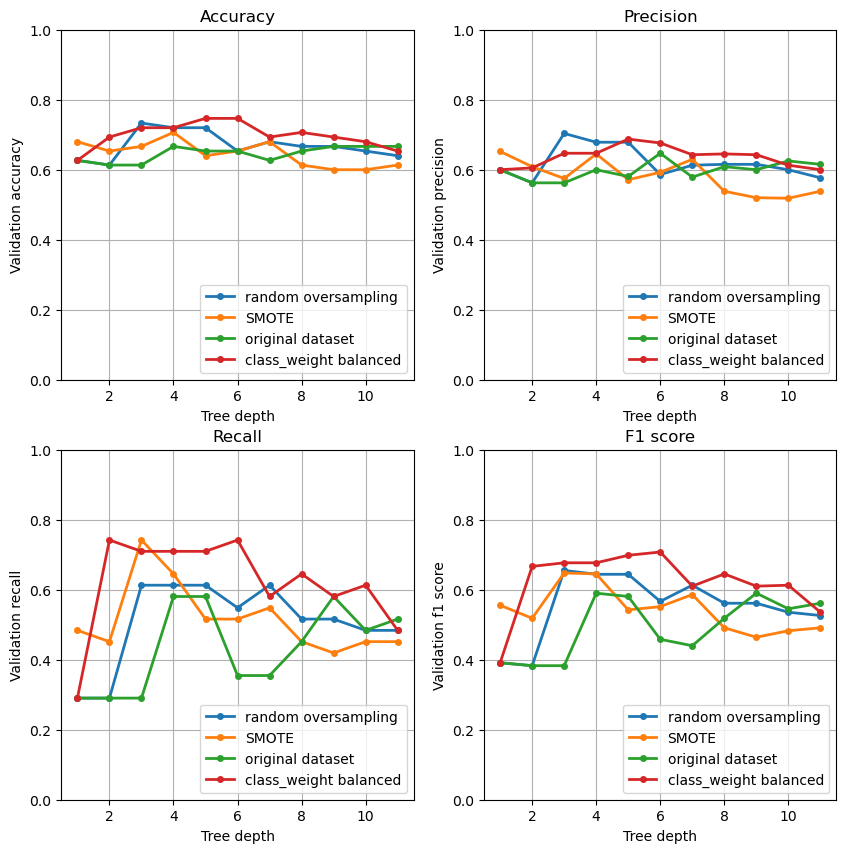

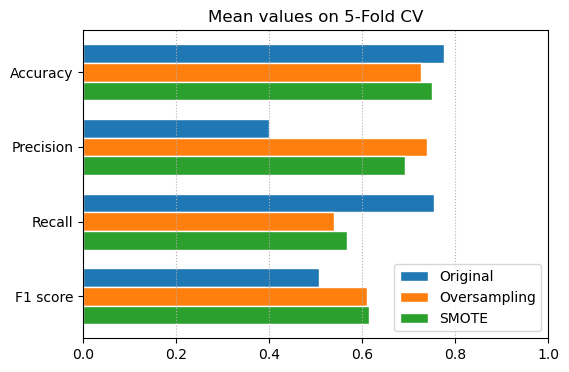

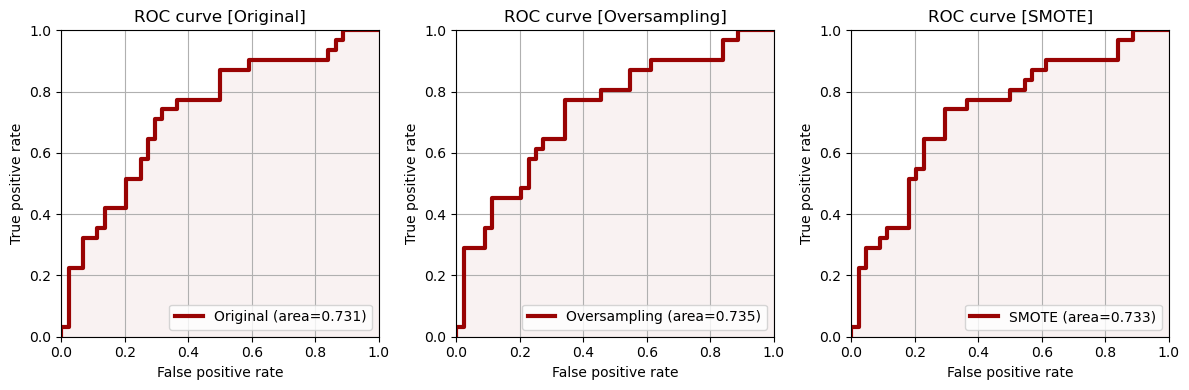

In [66]:
fpr_rs, tpr_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_rs)
fpr_no_rs, tpr_no_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_no_rs)
fpr_sm, tpr_sm, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_sm)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(fpr_no_rs, tpr_no_rs, label=f"Original (area={roc_area(tpr_no_rs, fpr_no_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Original]")
plt.fill_between(fpr_no_rs, 0, tpr_no_rs, alpha=0.05, color='#990303')

plt.subplot(1, 3, 2)
plt.plot(fpr_rs, tpr_rs, label=f"Oversampling (area={roc_area(tpr_rs, fpr_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Oversampling]")
plt.fill_between(fpr_rs, 0, tpr_rs, alpha=0.05, color='#990303')

plt.subplot(1, 3, 3)
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (area={roc_area(tpr_sm, fpr_sm)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [SMOTE]")
plt.fill_between(fpr_sm, 0, tpr_sm, alpha=0.05, color='#990303');

plt.tight_layout()

In [67]:
c = 1
penalty = "l2"
solver = "liblinear"
multi_class = "auto"

# oversampled
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# SMOTE 
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_sm = lr.predict_proba(ho_val_df[all_features])[:, 1]

sm_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
sm_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
sm_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
sm_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# not oversampled
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_no_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

no_rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

# class-weight
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight="balanced",
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_w = lr.predict_proba(ho_val_df[all_features])[:, 1]

w_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
w_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
w_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
w_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [68]:
# oversampled
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

rs_acc, rs_rec, rs_pre, rs_f1 = kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                  threshold=0.5, resampling="oversampling")
    
# SMOTE 
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

sm_acc, sm_rec, sm_pre, sm_f1= kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                 threshold=0.5, resampling="SMOTE", cached=True)
    
# not oversampled
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1= kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5)

# class-weight
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight="balanced",
                   random_state=42, solver=solver, multi_class=multi_class)

w_acc, w_rec, w_pre, w_f1= kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5)

C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_samples)))
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(new_samples)
C:\Users\basan\AppData\Local\Temp\ipykernel_16704\3907338840.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([1]*len(new_sampl

In [69]:
'''
print(f"no_rs:{no_rs_acc},{no_rs_f1}")
print(f"rs:{rs_acc},{rs_f1}")
print(f"sm:{sm_acc},{sm_f1}")
print(f"w:{w_acc},{w_f1}")
''';

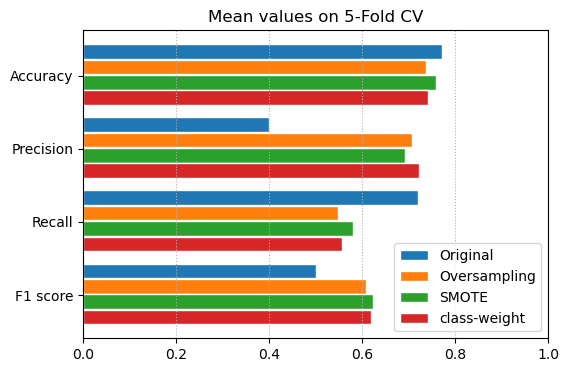

In [70]:
# https://python-graph-gallery.com/11-grouped-barplot/

fig = plt.figure(figsize=(6, 4))
barWidth = 0.2
space=0.01
 
bars1 = [no_rs_f1, no_rs_rec, no_rs_pre, no_rs_acc]
bars2 = [rs_f1, rs_rec, rs_pre, rs_acc]
bars3 = [sm_f1, sm_rec, sm_pre, sm_acc]
bars4 = [w_f1, w_rec, w_pre, w_acc]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]
r3 = [x + barWidth + space for x in r2]
r4 = [x + barWidth + space for x in r3]

plt.barh(r4, bars1, label="Original",height=barWidth, edgecolor='white', )
plt.barh(r3, bars2, label="Oversampling", height=barWidth, edgecolor='white',)
plt.barh(r2, bars3, label="SMOTE", height=barWidth, edgecolor='white', )
plt.barh(r1, bars4, label="class-weight", height=barWidth, edgecolor='white', )

plt.title("Mean values on 5-Fold CV")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["F1 score", "Recall", "Precision", "Accuracy", ])
plt.xlim(0, 1)
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

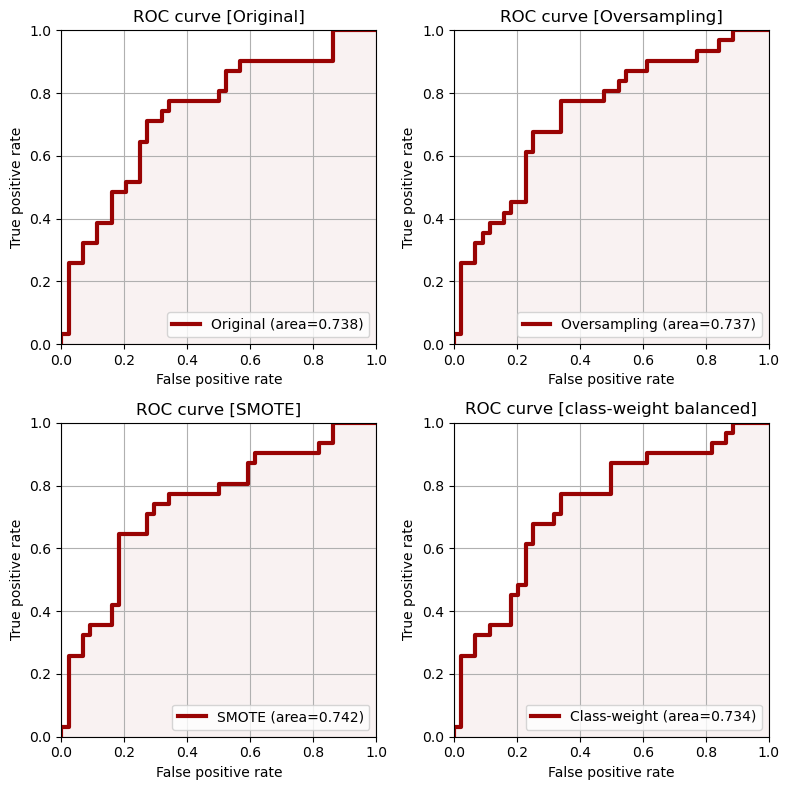

In [71]:
fpr_rs, tpr_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_rs)
fpr_no_rs, tpr_no_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_no_rs)
fpr_sm, tpr_sm, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_sm)
fpr_w, tpr_w, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_w)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(fpr_no_rs, tpr_no_rs, label=f"Original (area={roc_area(tpr_no_rs, fpr_no_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Original]")
plt.fill_between(fpr_no_rs, 0, tpr_no_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 2)
plt.plot(fpr_rs, tpr_rs, label=f"Oversampling (area={roc_area(tpr_rs, fpr_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Oversampling]")
plt.fill_between(fpr_rs, 0, tpr_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 3)
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (area={roc_area(tpr_sm, fpr_sm)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [SMOTE]")
plt.fill_between(fpr_sm, 0, tpr_sm, alpha=0.05, color='#990303')

plt.subplot(2, 2, 4)
plt.plot(fpr_w, tpr_w, label=f"Class-weight (area={roc_area(tpr_w, fpr_w)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [class-weight balanced]")
plt.fill_between(fpr_w, 0, tpr_w, alpha=0.05, color='#990303');

plt.tight_layout()